In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data['left'].unique()

array([1, 0], dtype=int64)

In [4]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [5]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
data['salary'] = data['salary'].map({'low':0, 'medium':1, 'high':2})

In [7]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [8]:
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])

In [9]:
data['Department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [10]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0


In [11]:
data['salary'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                 int32
salary                     int64
dtype: object

<AxesSubplot:xlabel='salary', ylabel='left'>

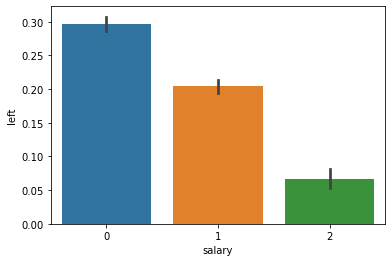

In [13]:
sns.barplot(x = data['salary'],y = data['left'])

<AxesSubplot:xlabel='Department', ylabel='left'>

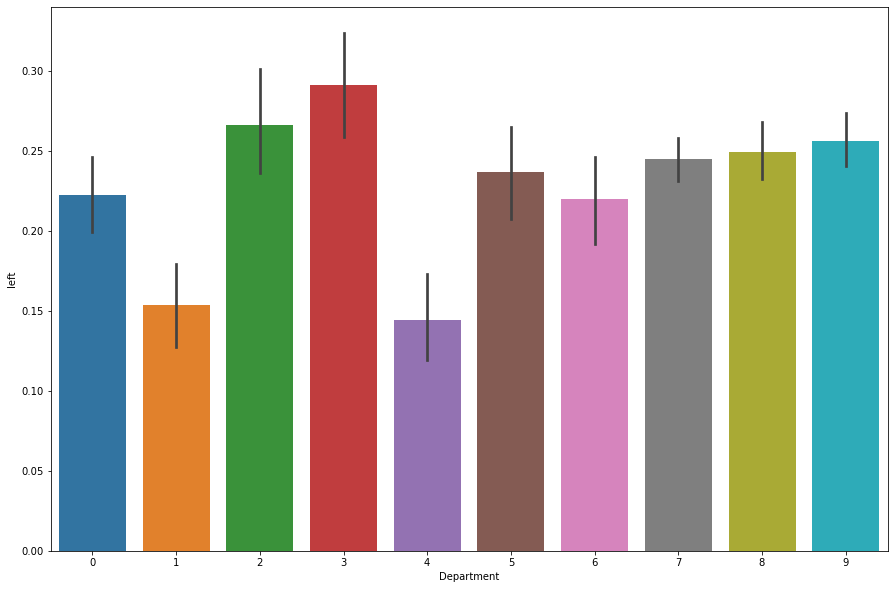

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x = data['Department'], y = data['left'])

<AxesSubplot:xlabel='Work_accident', ylabel='left'>

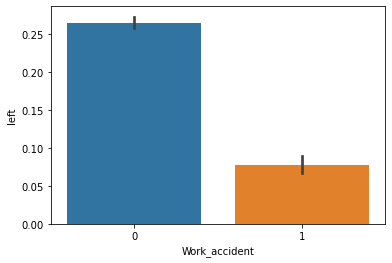

In [25]:
sns.barplot(x = data['Work_accident'], y = data['left'])

In [26]:
x = data.drop('left', axis=1)
y = data['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =32)

In [27]:
log = LogisticRegression()
log.fit(x_train, y_train)

C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
log.score(x_train, y_train)

0.7975045242404039

In [29]:
log.score(x_test, y_test)

0.7984444444444444

In [30]:
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

0.7984444444444444

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3179,  281],
       [ 626,  414]], dtype=int64)

<AxesSubplot:>

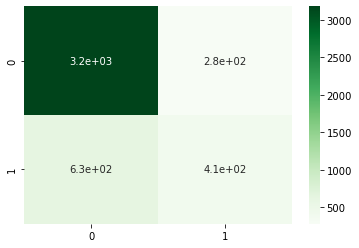

In [32]:
sns.heatmap(cm, annot=True, cmap='Greens')

In [33]:
3.2*(10**3)

3200.0

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3460
           1       0.60      0.40      0.48      1040

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.68      4500
weighted avg       0.78      0.80      0.78      4500

